<div class="alert alert-block alert-info"><h1>ETL: Bitcoin vs MXN Peso<h1/><div/>

In [4]:
import pandas as pd
from sqlalchemy import create_engine

In [5]:
import numpy as np
import requests

# Extract API/CSV into Data Frames

In [3]:
# We used a csv file if API connection failed
# bitcoin_file = "/Users/roas/Desktop/ETL_project/resources/bitcoin_dataset.csv"

In [4]:
# tcp_dollar_peso_file = '/Users/roas/Desktop/ETL_project/resources/tpc_11_19.csv'

In [5]:
# bitcoin_df = pd.read_csv(bitcoin_file)

In [6]:
# tcp_df = pd.read_csv(tcp_dollar_peso_file)

<div class="alert alert-block  alert-danger"><b>API connection to Kaggle<b/><div/>

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi({"username":"luisdiaz9","key":"683a230e5ecead1e22bb67219591de1e"})
api.authenticate()
files = api.dataset_download_files('sudalairajkumar/cryptocurrencypricehistory')
#kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory

In [4]:
import kaggle as kg
kg.api.authenticate()
kg.api.dataset_download_files(dataset="sudalairajkumar/cryptocurrencypricehistory", unzip=False)

import pandas as pd
import zipfile

zf = zipfile.ZipFile('cryptocurrencypricehistory.zip') 
bitcoin_df = pd.read_csv(zf.open('bitcoin_dataset.csv'))

#df= df.set_index('Date')

In [5]:
bitcoin_df.head(2)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24 00:00:00,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0


In [6]:
bitcoin_df.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

<div class="alert alert-block  alert-danger"><b>Api to get TCP from Banxico<b/><div/>

In [1]:
token = 'f384d37a2819d8728a7275ca35b7d390cbc1a5fb4d28c5695603491168ac032f';
start_date = '2010-02-23'
end_date = '2019-07-31'
catalog = 'SF43786'

In [2]:
query1 = f'https://www.banxico.org.mx/SieAPIRest/service/v1/series/{catalog}/datos/{start_date}/{end_date}?token={token}';
query1

'https://www.banxico.org.mx/SieAPIRest/service/v1/series/SF43786/datos/2010-02-23/2019-07-31?token=f384d37a2819d8728a7275ca35b7d390cbc1a5fb4d28c5695603491168ac032f'

In [9]:
tcp_info_json = requests.get(query1).json()
tcp_info_json

{'bmx': {'series': [{'idSerie': 'SF43786',
    'titulo': 'Tipo de cambio Pesos por dólar E.U.A. Interbancario a 48 horas Cierre venta',
    'datos': [{'fecha': '23/02/2010', 'dato': '12.8990'},
     {'fecha': '24/02/2010', 'dato': '12.8497'},
     {'fecha': '25/02/2010', 'dato': '12.8275'},
     {'fecha': '26/02/2010', 'dato': '12.7790'},
     {'fecha': '01/03/2010', 'dato': '12.7410'},
     {'fecha': '02/03/2010', 'dato': '12.7430'},
     {'fecha': '03/03/2010', 'dato': '12.7070'},
     {'fecha': '04/03/2010', 'dato': '12.7070'},
     {'fecha': '05/03/2010', 'dato': '12.6640'},
     {'fecha': '08/03/2010', 'dato': '12.6670'},
     {'fecha': '09/03/2010', 'dato': '12.6315'},
     {'fecha': '10/03/2010', 'dato': '12.6100'},
     {'fecha': '11/03/2010', 'dato': '12.5945'},
     {'fecha': '12/03/2010', 'dato': '12.5400'},
     {'fecha': '16/03/2010', 'dato': '12.5285'},
     {'fecha': '17/03/2010', 'dato': '12.4500'},
     {'fecha': '18/03/2010', 'dato': '12.5050'},
     {'fecha': '19/03/

In [7]:
tcp_info_json['bmx']['series'][0]['datos']

[{'fecha': '23/02/2010', 'dato': '12.8990'},
 {'fecha': '24/02/2010', 'dato': '12.8497'},
 {'fecha': '25/02/2010', 'dato': '12.8275'},
 {'fecha': '26/02/2010', 'dato': '12.7790'},
 {'fecha': '01/03/2010', 'dato': '12.7410'},
 {'fecha': '02/03/2010', 'dato': '12.7430'},
 {'fecha': '03/03/2010', 'dato': '12.7070'},
 {'fecha': '04/03/2010', 'dato': '12.7070'},
 {'fecha': '05/03/2010', 'dato': '12.6640'},
 {'fecha': '08/03/2010', 'dato': '12.6670'},
 {'fecha': '09/03/2010', 'dato': '12.6315'},
 {'fecha': '10/03/2010', 'dato': '12.6100'},
 {'fecha': '11/03/2010', 'dato': '12.5945'},
 {'fecha': '12/03/2010', 'dato': '12.5400'},
 {'fecha': '16/03/2010', 'dato': '12.5285'},
 {'fecha': '17/03/2010', 'dato': '12.4500'},
 {'fecha': '18/03/2010', 'dato': '12.5050'},
 {'fecha': '19/03/2010', 'dato': '12.5690'},
 {'fecha': '22/03/2010', 'dato': '12.5485'},
 {'fecha': '23/03/2010', 'dato': '12.4925'},
 {'fecha': '24/03/2010', 'dato': '12.5810'},
 {'fecha': '25/03/2010', 'dato': '12.5230'},
 {'fecha':

In [8]:
len(tcp_info_json['bmx']['series'][0]['datos'])

2374

In [16]:
date, dolar = [], [] 

for n in range(len(tcp_info_json['bmx']['series'][0]['datos'])):
    date.append(tcp_info_json['bmx']['series'][0]['datos'][n]['fecha'])
    dolar.append(tcp_info_json['bmx']['series'][0]['datos'][n]['dato'])

zippedList =  list(zip(date, dolar))
tcp_df = pd.DataFrame(zippedList, columns = ['date' , 'dolar']).dropna(how='any')

In [17]:
tcp_df.head(2)

,date,dolar
0,23/02/2010,12.8990
1,24/02/2010,12.8497


In [18]:
tcp_df.tail(2)

,date,dolar
2372,30/07/2019,19.0635
2373,31/07/2019,19.0000


# Transform Data

Columns used in __Bitcoin__ table: Date, btc_market_price, btc_total_bitcoins, btc_cost_per_transaction_percent, btc_n_transactions_total

In [19]:
new_bitcoin_df = bitcoin_df.copy()

In [20]:
columns_remove = [ 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees','btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume']

In [21]:
new_bitcoin_df.drop(columns_remove, axis = 1, inplace = True)

In [22]:
new_bitcoin_df.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_transactions_total', 'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [23]:
new_bitcoin_df.dtypes

Date                                     object
btc_market_price                        float64
btc_total_bitcoins                      float64
btc_cost_per_transaction_percent        float64
btc_cost_per_transaction                float64
btc_n_transactions_total                float64
btc_estimated_transaction_volume_usd    float64
dtype: object

In [24]:
# Transform the Date column into Date data type
new_bitcoin_df['Date'] = pd.to_datetime(new_bitcoin_df['Date'])

In [25]:
new_bitcoin_df.dtypes

Date                                    datetime64[ns]
btc_market_price                               float64
btc_total_bitcoins                             float64
btc_cost_per_transaction_percent               float64
btc_cost_per_transaction                       float64
btc_n_transactions_total                       float64
btc_estimated_transaction_volume_usd           float64
dtype: object

In [26]:
new_bitcoin_df['Date'].min()

Timestamp('2010-02-23 00:00:00')

In [27]:
new_bitcoin_df['Date'].max()

Timestamp('2018-02-20 00:00:00')

In [28]:
new_bitcoin_df.count()

Date                                    2920
btc_market_price                        2920
btc_total_bitcoins                      2920
btc_cost_per_transaction_percent        2920
btc_cost_per_transaction                2920
btc_n_transactions_total                2920
btc_estimated_transaction_volume_usd    2920
dtype: int64

### Review TCP Data Frame to leave it with the same period of time

In [29]:
tcp_df.dtypes

date     object
dolar    object
dtype: object

In [30]:
tcp_df['date'] = pd.to_datetime(tcp_df['date'], format="%d/%m/%Y")

In [31]:
tcp_df['dolar'] = pd.to_numeric(tcp_df['dolar'], errors='coerce')

In [32]:
tcp_df.dtypes

date     datetime64[ns]
dolar           float64
dtype: object

In [33]:
tcp_df['date'].min()

Timestamp('2010-02-23 00:00:00')

In [34]:
tcp_df['date'].max()

Timestamp('2019-07-31 00:00:00')

### The dates while start at 2010-02-23 and will end 2018-02-20 for both datasets

In [35]:
new_bitcoin_df.set_index('Date', inplace=True)

In [36]:
new_bitcoin_df.head(1)

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd
Date,,,,,,
2010-02-23,0.0,2110700.0,25100.0,0.0,42613.0,0.0


In [37]:
bitcoin_db = new_bitcoin_df.loc['2010-02-23':'2018-02-20'].copy()
bitcoin_db

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd
Date,,,,,,
2010-02-23,0.000000,2110700.0,25100.000000,0.000000,42613.0,0.000000e+00
2010-02-24,0.000000,2120200.0,179.245283,0.000000,42809.0,0.000000e+00
2010-02-25,0.000000,2127600.0,1057.142857,0.000000,42959.0,0.000000e+00
2010-02-26,0.000000,2136100.0,64.582059,0.000000,43135.0,0.000000e+00
2010-02-27,0.000000,2144750.0,1922.222222,0.000000,43311.0,0.000000e+00
2010-02-28,0.000000,2152850.0,154.285714,0.000000,43476.0,0.000000e+00
2010-03-01,0.000000,2162150.0,930.000000,0.000000,43663.0,0.000000e+00
2010-03-02,0.000000,2171950.0,376.923077,0.000000,43867.0,0.000000e+00
2010-03-03,0.000000,2179350.0,2960.000000,0.000000,44018.0,0.000000e+00


In [38]:
# Now review the TCP index
tcp_df.set_index('date',inplace = True)

In [39]:
tcp_df.head(5)

,dolar
date,
2010-02-23,12.8990
2010-02-24,12.8497
2010-02-25,12.8275
2010-02-26,12.7790
2010-03-01,12.7410


In [40]:
tcp_db = tcp_df.loc['2010-02-23':'2018-02-20'].copy()

In [41]:
tcp_db.head(1)

,dolar
date,
2010-02-23,12.899


In [42]:
tcp_db.tail(1)

,dolar
date,
2018-02-20,18.7195


In [43]:
tcp_db.count()

dolar    2012
dtype: int64

#### To create a similar period of measurement, we will need to resample both data sets. 

In [100]:
bitcoin_db = bitcoin_db.resample(rule='W').mean()
bitcoin_db

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd,id
date,,,,,,,
2010-02-28,0.000000,2.132033e+06,4746.246356,0.000000,4.305050e+04,0.000000e+00,1
2010-03-07,0.000000,2.188636e+06,650.593700,0.000000,4.420800e+04,0.000000e+00,2
2010-03-14,0.000000,2.243314e+06,594.100431,0.000000,4.532914e+04,0.000000e+00,3
2010-03-21,0.000000,2.291779e+06,13934.745851,0.000000,4.632700e+04,0.000000e+00,4
2010-03-28,0.000000,2.353514e+06,343.695930,0.000000,4.763100e+04,0.000000e+00,5
2010-04-04,0.000000,2.419714e+06,746.759173,0.000000,4.901757e+04,0.000000e+00,6
2010-04-11,0.000000,2.481407e+06,182.660955,0.000000,5.035443e+04,0.000000e+00,7
2010-04-18,0.000000,2.553421e+06,132.773983,0.000000,5.219957e+04,0.000000e+00,8
2010-04-25,0.000000,2.625607e+06,143.780908,0.000000,5.684014e+04,0.000000e+00,9


In [45]:
bitcoin_db.count()

btc_market_price                        418
btc_total_bitcoins                      418
btc_cost_per_transaction_percent        418
btc_cost_per_transaction                418
btc_n_transactions_total                418
btc_estimated_transaction_volume_usd    418
dtype: int64

In [46]:
tcp_db = tcp_db.resample(rule = 'W').mean()

In [47]:
tcp_db.head(5)

,dolar
date,
2010-02-28,12.838800
2010-03-07,12.712400
2010-03-14,12.608600
2010-03-21,12.513125
2010-03-28,12.535000


In [48]:
tcp_db.count()

dolar    418
dtype: int64

In [49]:
tcp_db.head(5)

,dolar
date,
2010-02-28,12.838800
2010-03-07,12.712400
2010-03-14,12.608600
2010-03-21,12.513125
2010-03-28,12.535000


In [50]:
bitcoin_db.head(1)

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd
Date,,,,,,
2010-02-28,0.0,2.132033e+06,4746.246356,0.0,43050.5,0.0


In [51]:
bitcoin_db.rename_axis('date', inplace=True)

### With the same period, we can compare the trend of both data sets

In [52]:
tcp_db['id'] = np.arange(1,len(tcp_db)+1)

In [53]:
tcp_db.head(3)

,dolar,id
date,,
2010-02-28,12.8388,1
2010-03-07,12.7124,2
2010-03-14,12.6086,3


In [54]:
bitcoin_db['id'] = np.arange(1,len(bitcoin_db)+1)

In [55]:
bitcoin_db['id'].head(3)

date
2010-02-28    1
2010-03-07    2
2010-03-14    3
Freq: W-SUN, Name: id, dtype: int32

In [99]:
bitcoin_db

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd,id,date
date,,,,,,,,
2010-02-28,0.000000,2.132033e+06,4746.246356,0.000000,4.305050e+04,0.000000e+00,1,2010-02-28
2010-03-07,0.000000,2.188636e+06,650.593700,0.000000,4.420800e+04,0.000000e+00,2,2010-03-07
2010-03-14,0.000000,2.243314e+06,594.100431,0.000000,4.532914e+04,0.000000e+00,3,2010-03-14
2010-03-21,0.000000,2.291779e+06,13934.745851,0.000000,4.632700e+04,0.000000e+00,4,2010-03-21
2010-03-28,0.000000,2.353514e+06,343.695930,0.000000,4.763100e+04,0.000000e+00,5,2010-03-28
2010-04-04,0.000000,2.419714e+06,746.759173,0.000000,4.901757e+04,0.000000e+00,6,2010-04-04
2010-04-11,0.000000,2.481407e+06,182.660955,0.000000,5.035443e+04,0.000000e+00,7,2010-04-11
2010-04-18,0.000000,2.553421e+06,132.773983,0.000000,5.219957e+04,0.000000e+00,8,2010-04-18
2010-04-25,0.000000,2.625607e+06,143.780908,0.000000,5.684014e+04,0.000000e+00,9,2010-04-25


In [57]:
bitcoin_db['date'] = bitcoin_db.index

In [58]:
tcp_db['date'] = tcp_db.index

# Create database connection

In [87]:
rds_conn = "postgres:Pbkdckqi$9@localhost:5432/bitcoin_db"
engine = create_engine(f'postgresql://{rds_conn}')

In [88]:
engine.table_names()

['bitcoin', 'tcp']

In [89]:
bitcoin_db.to_sql(name='bitcoin', con=engine, if_exists='append', index=False)

In [98]:
pd.read_sql_query('SELECT * FROM bitcoin', con = engine)

,date,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd,id
0,2010-02-28,0.000000,2.132033e+06,4746.246356,0.000000,4.305050e+04,0.000000e+00,1
1,2010-03-07,0.000000,2.188636e+06,650.593700,0.000000,4.420800e+04,0.000000e+00,2
2,2010-03-14,0.000000,2.243314e+06,594.100431,0.000000,4.532914e+04,0.000000e+00,3
3,2010-03-21,0.000000,2.291779e+06,13934.745851,0.000000,4.632700e+04,0.000000e+00,4
4,2010-03-28,0.000000,2.353514e+06,343.695930,0.000000,4.763100e+04,0.000000e+00,5
5,2010-04-04,0.000000,2.419714e+06,746.759173,0.000000,4.901757e+04,0.000000e+00,6
6,2010-04-11,0.000000,2.481407e+06,182.660955,0.000000,5.035443e+04,0.000000e+00,7
7,2010-04-18,0.000000,2.553421e+06,132.773983,0.000000,5.219957e+04,0.000000e+00,8
8,2010-04-25,0.000000,2.625607e+06,143.780908,0.000000,5.684014e+04,0.000000e+00,9
9,2010-05-02,0.000000,2.684200e+06,135.594296,0.000000,5.830700e+04,0.000000e+00,10


In [91]:
tcp_db.to_sql(name='tcp', con=engine, if_exists='append', index=False)

In [92]:
pd.read_sql_query('SELECT * FROM tcp', con = engine).head(2)

,date,dolar,id
0,2010-02-28,12.8388,1
1,2010-03-07,12.7124,2


In [97]:
bit_dolar_DF=pd.merge(bitcoin_db,tcp_db,on='id', how='inner').dropna(how='any')

bit_dolar_DF.set_index('id', inplace=True)
# por si es necesario borrar columna..
del bit_dolar_DF['date_y']

In [94]:
bit_dolar_DF

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd,date_x,dolar
id,,,,,,,,
1,0.000000,2.132033e+06,4746.246356,0.000000,4.305050e+04,0.000000e+00,2010-02-28,12.838800
2,0.000000,2.188636e+06,650.593700,0.000000,4.420800e+04,0.000000e+00,2010-03-07,12.712400
3,0.000000,2.243314e+06,594.100431,0.000000,4.532914e+04,0.000000e+00,2010-03-14,12.608600
4,0.000000,2.291779e+06,13934.745851,0.000000,4.632700e+04,0.000000e+00,2010-03-21,12.513125
5,0.000000,2.353514e+06,343.695930,0.000000,4.763100e+04,0.000000e+00,2010-03-28,12.535000
6,0.000000,2.419714e+06,746.759173,0.000000,4.901757e+04,0.000000e+00,2010-04-04,12.398333
7,0.000000,2.481407e+06,182.660955,0.000000,5.035443e+04,0.000000e+00,2010-04-11,12.233400
8,0.000000,2.553421e+06,132.773983,0.000000,5.219957e+04,0.000000e+00,2010-04-18,12.200100
9,0.000000,2.625607e+06,143.780908,0.000000,5.684014e+04,0.000000e+00,2010-04-25,12.216220


<IPython.core.display.Javascript object>


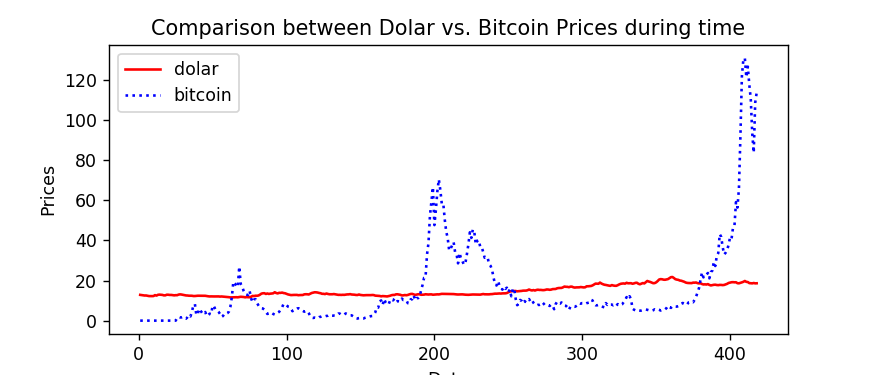

<IPython.core.display.Javascript object>


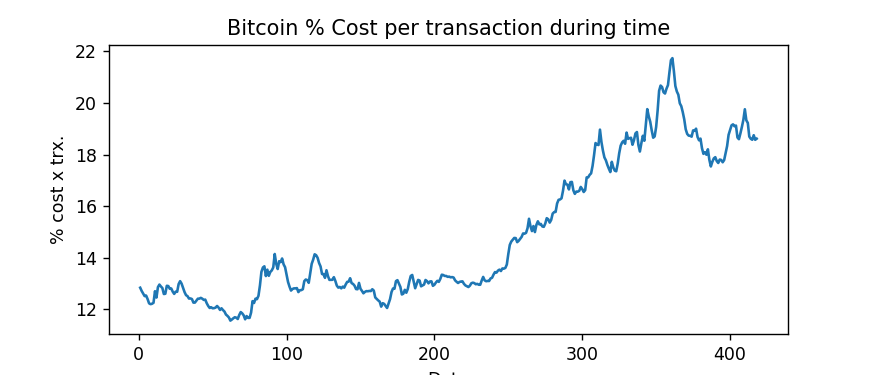

In [95]:
#plots
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Plot Prices
#data1
x = bit_dolar_DF.index.tolist()
#x = bit_dolar_DF.date
y = bit_dolar_DF.btc_cost_per_transaction
plt.figure(figsize=(7,3))
#data2
q = bit_dolar_DF.index.tolist()
#q = bit_dolar_DF.date
w = bit_dolar_DF.dolar
dolar=plt.plot(q, w, '-r')
bitcoin=plt.plot(x, y, ':b')
plt.title('Comparison between Dolar vs. Bitcoin Prices during time')
plt.xlabel('Date')
plt.ylabel('Prices')

plt.legend(["dolar", "bitcoin"])

#Plot bit coin btc_cost_per_transaction_percent
plt.figure(figsize=(7,3))
x = bit_dolar_DF.index.tolist()
#x = bit_dolar_DF.date
y = bit_dolar_DF.btc_cost_per_transaction_percent
plt.plot(q, w, '-')
plt.title('Bitcoin % Cost per transaction during time')
plt.xlabel('Date')
plt.ylabel('% cost x trx.')

#obtain correlation
from scipy import stats
# Y and Z are numpy arrays or lists of variables
corr=stats.pearsonr(bit_dolar_DF.dolar,bit_dolar_DF.btc_cost_per_transaction)